In [1]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
current_image = "/Users/Kristen/Desktop/06212016_WYK8440_Scaled_plusG1/5_seconds_1/processedImages/Cell_1/Targets_crop.tif" 

In [3]:
im = Image.open(current_image)

In [4]:
im.show()

In [5]:
im_sharp = im.filter(ImageFilter.SHARPEN)

In [6]:
im.show()

In [7]:
im_sharp.show()

<type 'numpy.ndarray'> (512, 512, 3) float32



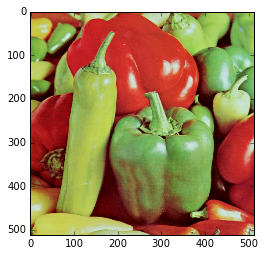

In [2]:
%matplotlib inline

im = plt.imread("/Users/Kristen/Image-Analysis-in-Python/sample-images/peppers.png") #
print type(im), im.shape, im.dtype
print
plt.imshow(im)

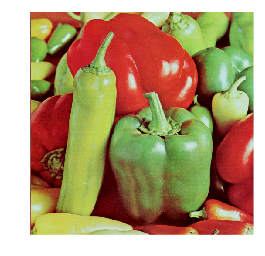

In [3]:
#writing your own show function might be useful if you want to see images in a specific way without always having to 
    #change the matplotlib preferences
def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
    plt.figure()
    plt.imshow(im, interpolation='none', **kwargs)
    if title: 
        plt.title(title)
    plt.axis('off')
    
my_imshow(im)

manipulate pixels the same way as you do with numpy arrays (basically an image is just an array of pixel intensities)

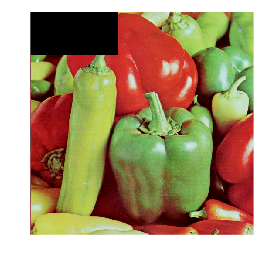

In [8]:
im[:100, :200, :] = 0
my_imshow(im)

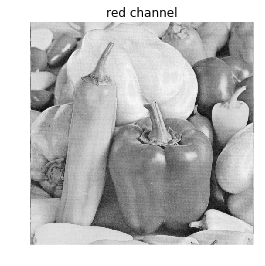

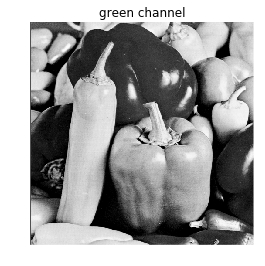

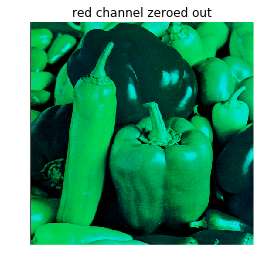

In [4]:
im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/peppers.png')
red = im[..., 0] #dont understand what this means
green = im[..., 1] 

#the notes say that the '...' syntax means it covers 'all the dimensions except the last one'
#does that mean the last digit in the brackets?
#oooooh I got it. im.shape = [512, 512, 3]. Show me 512, 512, but for the last dimension (3) only show me the 0th (red)
    #or 1th (green) or 2th (blue) 

my_imshow(red, 'red channel') #string is title
plt.show()

my_imshow(green, 'green channel')

im[:,:,0] = 0 #all the values in the 2d array 512,512 and the 0th of the 3rd dimension (red) make equal 0 (overwrite
    #the pixel intensity values with 0)
    
my_imshow(im, 'red channel zeroed out')

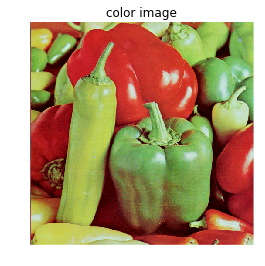

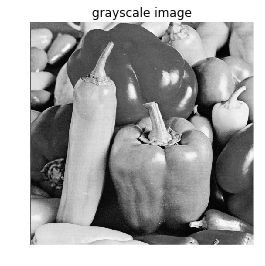

In [5]:
from skimage.color import rgb2gray

im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/peppers.png')
gray_im = rgb2gray(im)

my_imshow(im, title='color image')
my_imshow(gray_im, title='grayscale image')

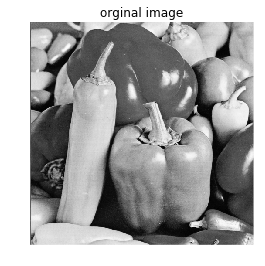

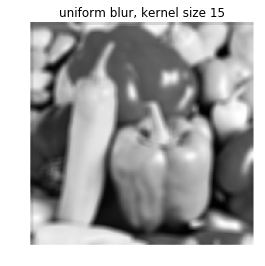

In [6]:
from skimage import filters
from scipy.ndimage.filters import convolve
from skimage import color

im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/peppers.png')
gray_im = color.rgb2gray(im)

#uniform blur
kern_size = 15
kernel = np.ones((kern_size, kern_size))/kern_size**2 #a uniform filter will produce a simple average
    # I dont understand whats happening to the array of ones in this situation..
    # its making a 15x15 array of ones and then each of those 1s are being divided by 15^2, because this is the
        #average somehow?
        
uniform_blurred = convolve(gray_im, kernel)

my_imshow(gray_im, 'orginal image')
my_imshow(uniform_blurred, 'uniform blur, kernel size %i' % kern_size)

[ 0.011109    0.02279418  0.04393693  0.07955951  0.13533528  0.21626517
  0.32465247  0.45783336  0.60653066  0.7548396   0.8824969   0.96923323
  1.          0.96923323  0.8824969   0.7548396   0.60653066  0.45783336
  0.32465247  0.21626517  0.13533528  0.07955951  0.04393693  0.02279418
  0.011109  ] (25,)
(25, 25)
gaussian


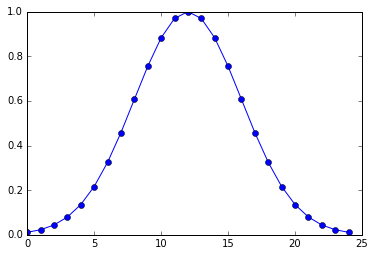

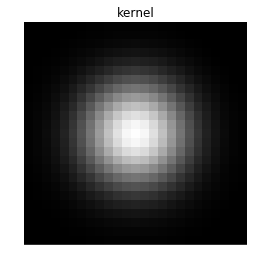

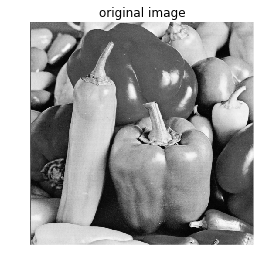

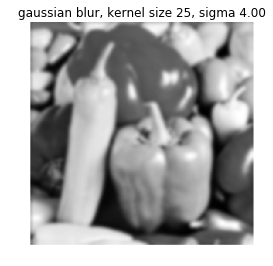

In [9]:
from scipy.signal import gaussian

#gaussian blur

kern_size = 25 #this is the number of points in the output window
sigma = 4 #this is the std
kernel_1d = gaussian(kern_size, sigma) #this is the kernel to ultimately do the blur with. Builds a matrix
print kernel_1d, kernel_1d.shape
kernel = np.outer(kernel_1d, kernel_1d)
print kernel.shape
gauss_blurred = convolve(gray_im, kernel)

print 'gaussian'
plt.plot(kernel_1d, 'o-')
my_imshow(kernel, 'kernel')
my_imshow(gray_im, 'original image')
my_imshow(gauss_blurred, 'gaussian blur, kernel size %i, sigma %.2f' %(kern_size, sigma))

In image processing, a kernel, convolution matrix, or mask is a small matrix useful for blurring, sharpening, embossing, edge detection, and more. This is accomplished by means of convolution between a kernel and an image. (wikipedia)

np.outer:
Given two vectors, a = [a0, a1, ..., aM] and b = [b0, b1, ..., bN], the outer product [R55] is:

[[a0*b0  a0*b1 ... a0*bN ]
 [a1*b0    .
 [ ...          .
 [aM*b0            aM*bN ]]

Note: Both the uniform blur and the gaussian blur have efficient library implementations. In the above examples, I used explicit convolution calls to illustrate how these library functions work "under the hood". In production, you should use the library functions uniform filter and gaussian_filter to do blurring. scipy.ndimage also has a number of useful filtering functions which will work on 3D images.

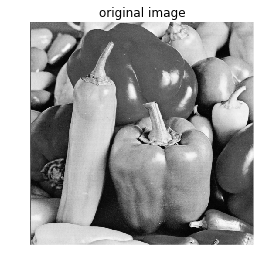

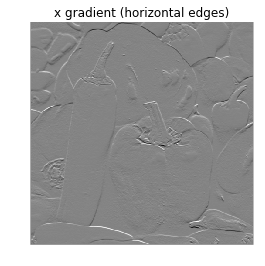

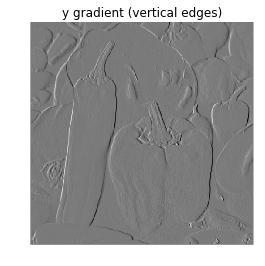

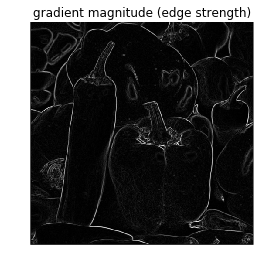

In [7]:
#Filtering: Gradients
from skimage import filters

grad_x = filters.sobel_h(gray_im) #Find the horizontal edges of an image using the Sobel transform.
grad_y = filters.sobel_v(gray_im) #	Find the vertical edges of an image using the Sobel transform.
grad_mag = np.sqrt(grad_x**2 + grad_y**2) 
    #At each point in the image, the resulting gradient approximations can be combined to give the gradient magnitude, using:
            # G = sqrt(grad_x**2 + grad_y**2)
    #make a np.array because that's what the image is

my_imshow(gray_im, 'original image')
my_imshow(grad_x, "x gradient (horizontal edges)")
my_imshow(grad_y, 'y gradient (vertical edges)')
my_imshow(grad_mag, 'gradient magnitude (edge strength)')

The Sobel operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


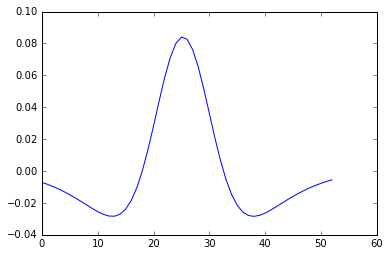

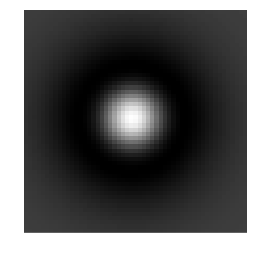

In [8]:
#Filtering: Blob Detection
    #difference of gaussians (dog)
    
sigma_1 = 7.
sigma_2 = 2.5*sigma_1
kern_size = 3*sigma_2

x,y = np.mgrid[-kern_size/2+1:kern_size/2+1, -kern_size/2+1:kern_size/2+1]
rsqr = x**2 + y**2 #what is rsqr?
gaussian_1 = np.exp(-rsqr/sigma_1**2)/sigma_1
gaussian_2 = np.exp(-rsqr/sigma_2**2)/sigma_2
dog_kern = gaussian_1 - gaussian_2

plt.figure()
plt.plot(dog_kern[:, kern_size/2])

my_imshow(dog_kern)

http://eli.thegreenplace.net/2014/meshgrids-and-disambiguating-rows-and-columns-from-cartesian-coordinates/

Explains meshgrids

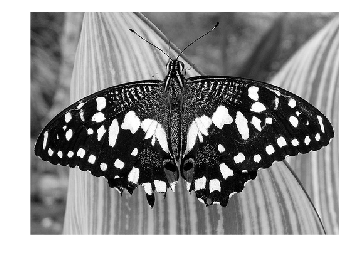

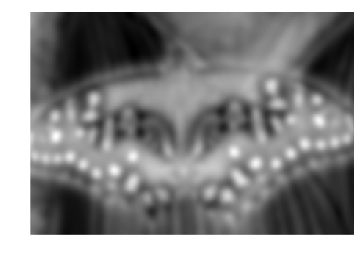

In [9]:
from scipy.signal import fftconvolve #fftconvolve is usually much faster than plain convolve (they do the same thing)

im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/butterfly.png')
gray_im = color.rgb2gray(im)

blob_im =fftconvolve(gray_im, dog_kern, mode='valid')

my_imshow(gray_im)
my_imshow(blob_im)

(array([  4.00000000e+01,   1.79000000e+02,   4.00000000e+02,
          7.74000000e+02,   1.33800000e+03,   2.07900000e+03,
          2.99900000e+03,   3.84700000e+03,   4.55500000e+03,
          4.58400000e+03,   4.69000000e+03,   4.27500000e+03,
          3.87800000e+03,   3.28200000e+03,   2.82400000e+03,
          2.30300000e+03,   2.08700000e+03,   1.94800000e+03,
          1.91000000e+03,   1.92600000e+03,   2.09400000e+03,
          2.05300000e+03,   2.14600000e+03,   2.11700000e+03,
          2.14400000e+03,   2.22200000e+03,   2.52000000e+03,
          2.67000000e+03,   3.09900000e+03,   3.60300000e+03,
          4.30000000e+03,   4.44600000e+03,   4.15700000e+03,
          3.93600000e+03,   3.54400000e+03,   3.22200000e+03,
          3.08900000e+03,   3.19000000e+03,   3.13300000e+03,
          3.38700000e+03,   3.64800000e+03,   4.26100000e+03,
          4.89100000e+03,   5.10400000e+03,   5.08500000e+03,
          4.79500000e+03,   4.27600000e+03,   4.25600000e+03,
        

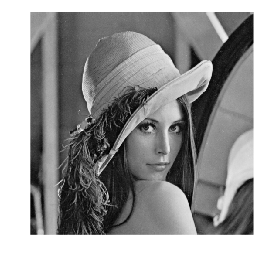

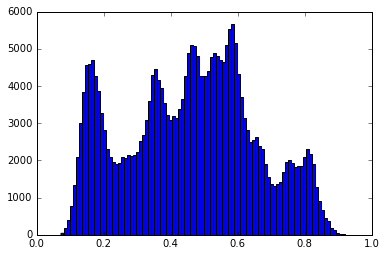

In [10]:
#Thresholding
%matplotlib inline

im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/lena.png')
gray_im = color.rgb2gray(im)

my_imshow(gray_im)

plt.figure()
plt.hist(gray_im.ravel(), bins=100)
#the .ravel() is doing some kind of flattening. Don't know why or what the benefit is... Well it wont plot with out it.
    #it must somehow be making the gray_im much less complex so that its plot-able


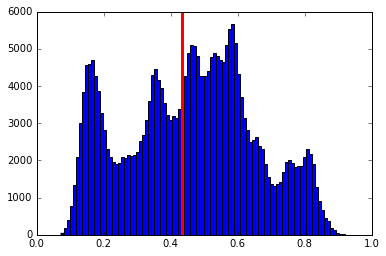

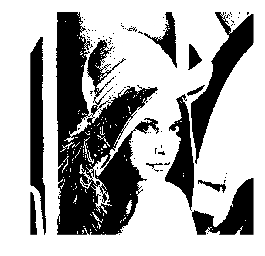

In [12]:
# use otsu's algorithm to select threshold

thresh = filters.threshold_otsu(gray_im)
thresholded = gray_im > thresh 
    # make a new array but only of the values in gray that are greater than the thresh values
    # looking for spots greater than the threshold

plt.figure()
plt.hist(gray_im.ravel(), bins=100)
plt.plot([thresh,thresh], [0,6000], linewidth=3, color='r')

my_imshow(thresholded)

thresh=  0.530300981501


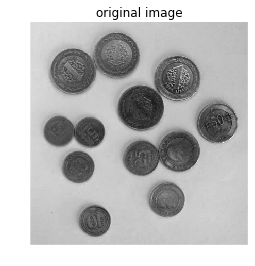

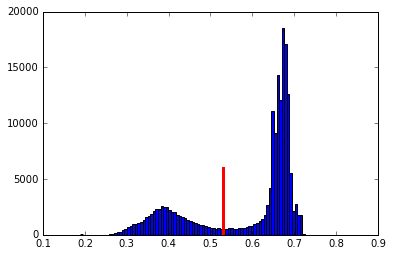

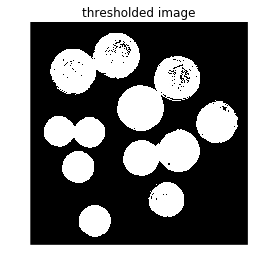

In [15]:
## dark on bright background
im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/coins.png')
gray_im = color.rgb2gray(im)
thresh = filters.threshold_otsu(gray_im)
print 'thresh= ', thresh
coins = gray_im < thresh #look for spots less-than the threshold

my_imshow(gray_im, 'original image')

plt.figure()
plt.hist(gray_im.ravel(), bins=100)
plt.plot([thresh, thresh], [0,6000], linewidth=3, color='r')

my_imshow(coins, 'thresholded image')

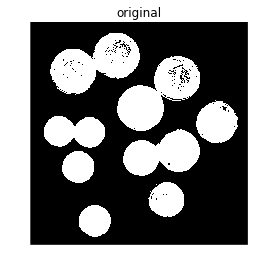

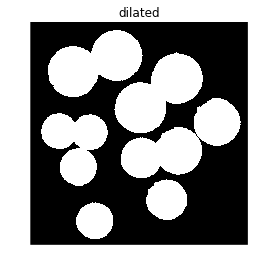

In [17]:
#Morphology

from skimage import morphology
from skimage.morphology import disk

dilated = morphology.binary_dilation(coins, disk(5))
    #Dilation enlarges bright regions and shrinks dark regions.
    #Disk
    #Generates a flat, disk-shaped structuring element.
    #A pixel is within the neighborhood if the euclidean distance between it and the origin is no greater than radius.

my_imshow(coins, title='original')
plt.figure()
my_imshow(dilated, title='dilated')

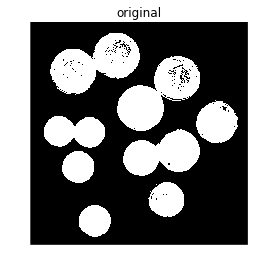

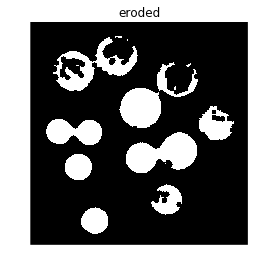

In [18]:
eroded = morphology.binary_erosion(coins, disk(5))

#erosion
my_imshow(coins, title='original')
my_imshow(eroded, title='eroded')

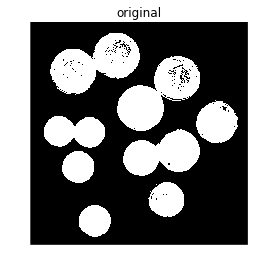

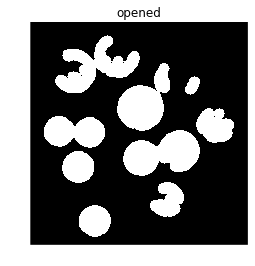

In [19]:
opened = morphology.binary_opening(coins, disk(10))

#opening
my_imshow(coins, title='original')
my_imshow(opened, title='opened')

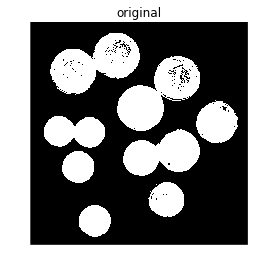

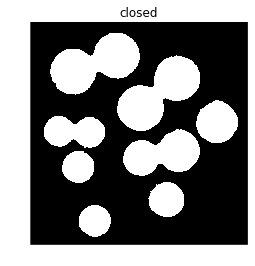

In [20]:
closed = morphology.binary_closing(coins, disk(5))

#closing
my_imshow(coins, title='original')
my_imshow(closed, title='closed')

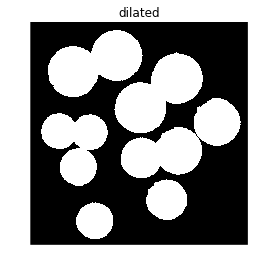

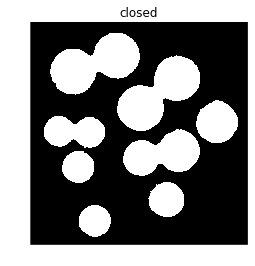

In [21]:
my_imshow(dilated, "dilated")
my_imshow(closed, 'closed')

A very helpful function for removing specks is the aptly-named remove_small_objects. For this mask, we first invert the mask (using python's not operator, ~), remove the small objects, and then re-invert it so the background is black.


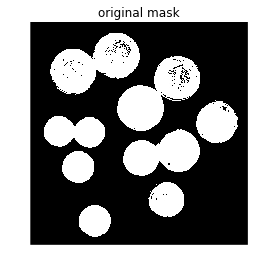

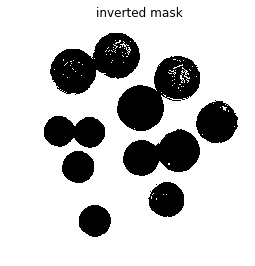

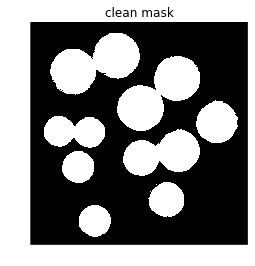

In [22]:
clean_coin_mask = ~morphology.remove_small_objects(~coins, min_size=120)

my_imshow(coins, cmap='gray', title='original mask')
plt.figure()
my_imshow(~coins, cmap='gray', title='inverted mask')
plt.figure()
my_imshow(clean_coin_mask, cmap = 'gray', title='clean mask')
    #dont totally understand why the clean mask returns as a white on black if the operation is done on the black on white?
    

number of coins: 12


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: The default value for `background` will change to 0 in v0.12


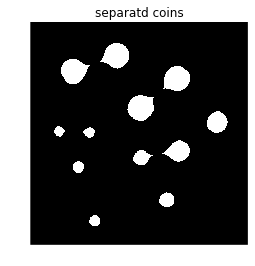

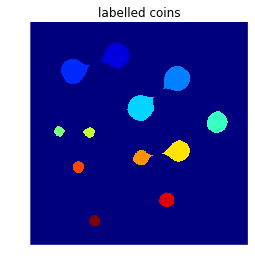

In [23]:
from skimage import measure

separated_coins = morphology.binary_erosion(closed, disk(20))
labelled_coins = measure.label(separated_coins)
    #what does the label do?
    
my_imshow(separated_coins, title='separatd coins')
plt.figure()
my_imshow(labelled_coins, cmap='jet', title='labelled coins')

num_coins = len(np.unique(labelled_coins))-1 #subtract 1 becauase the background in labelled 0
print 'number of coins: %i' %num_coins

# Worked Example: Segmentation

As an example of a typical image processing problem, we will segment the following image of bacteria.

original image shape:  (1024, 1024, 4)
alpha channel intensity: 1.00 +- 0.00


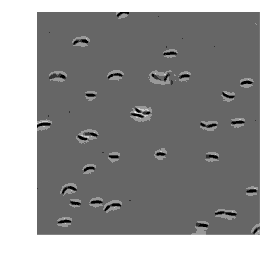

In [25]:
im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/caulobacter.png')
print 'original image shape: ', im.shape
print 'alpha channel intensity: %.2f +- %.2f' % (np.mean(im[:,:,-1]), np.std(im[:,:,-1]))

my_imshow(im)

First convert from color (4 channel, actually) to grayscale

grayscale image shape:  (1024, 1024)


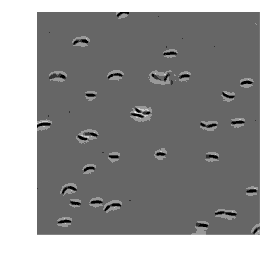

In [26]:
from skimage import color

#convert to gray
gray_im = color.rgb2gray(im)
print "grayscale image shape: ", gray_im.shape

my_imshow(gray_im)

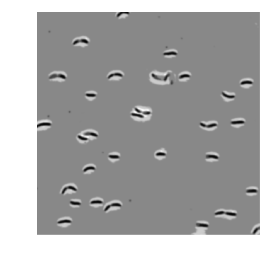

In [27]:
#blur slightly to reduce noise (isnt strictly necessary if you have a high quality image)

from skimage import filters

blurred_im = filters.gaussian_filter(gray_im, sigma=3) #sigma is the standard deviation of the gaussian kernel
my_imshow(blurred_im)


Threshold the image to convert it to a cell mask

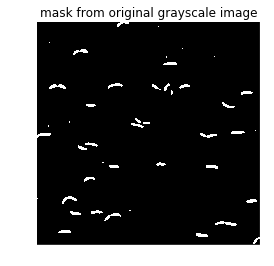

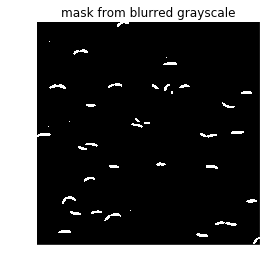

In [28]:
thresh = 0.3 #how was this chosen?
mask = gray_im < thresh
blurred_mask = blurred_im < thresh

my_imshow(mask, title='mask from original grayscale image')
my_imshow(blurred_mask, title='mask from blurred grayscale')

Binary images are manipulated with morphological operations, which all us to expand white regions, shrink white regions, fill in holes, etc. In this case we simply want to remove the tiny dots

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


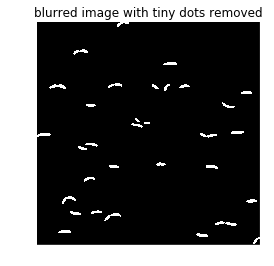

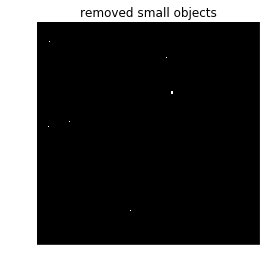

In [32]:
from skimage import morphology

blurred_mask_clean = morphology.remove_small_objects(blurred_mask, min_size=150)

my_imshow(blurred_mask_clean, title='blurred image with tiny dots removed')
my_imshow(blurred_mask - blurred_mask_clean, title='removed small objects')

Some of the cells are touching, so they appear as one object, but we would like to identify them as separate objects. This is a very common problem in segmentation problems, noteably cell tracking. A common approach is to perform a distance transform, followed by a watershed segmentation.

The distance transform converts a binary mask (black and white) into a floating point image (grayscale) of the same size (dimensions). Each pixel in the distance transfomr represents the distance of that pixel from the nearest black point in the mask. Thus, the brightest points in the distance transform are the points that are furthest from the object boundaries. 

distance transform:  (1024, 1024) float64


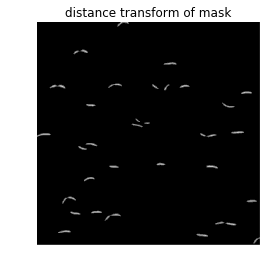

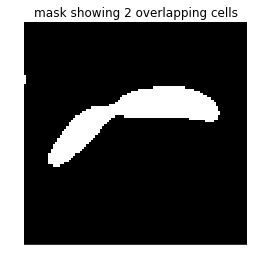

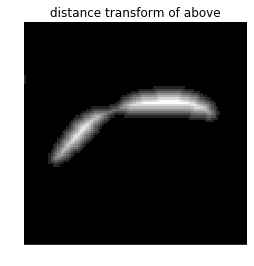

In [38]:
from scipy import ndimage as ndi

distance_im = ndi.distance_transform_edt(blurred_mask_clean)
print 'distance transform: ', distance_im.shape, distance_im.dtype

my_imshow(distance_im, title='distance transform of mask')
my_imshow(blurred_mask_clean[850:950, 300:400], title='mask showing 2 overlapping cells')
my_imshow(distance_im[850:950, 300:400], title='distance transform of above')

If we've done everything right, the peaks of the distance transform image represents the centers of each cell (including those that overlap). We label each peak with a unique integer with skimage.measure.label

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


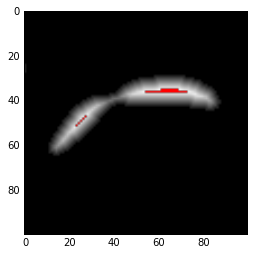

In [47]:
from skimage import feature, measure
from matplotlib.colors import ListedColormap

def imshow_overlay(im, mask, alpha=0.5, color='red', **kwargs):
    '''Show semi-transparent red mask over an image
    '''
    
    mask = mask > 0
    print mask
    print ~mask
    mask = np.ma.masked_where(~mask, mask) #Dont know what this is
        #np.ma.masked_where(condition, a). When the condition is met at that index in a, returns true
        #ultimately returns: The result of masking a where condition is True.
        #so in this case its where the mask equals the ~mask. Returns 
    print mask
    plt.imshow(im, **kwargs)
    plt.imshow(mask, alpha=alpha, cmap=ListedColormap([color]))
    
peaks_im = feature.peak_local_max(distance_im, indices=False)


#from BKLib import print_image_properties
#print_image_properties(distance_im)
#print_image_properties(peaks_im)

plt.figure()
imshow_overlay(distance_im[850:950, 300:400], peaks_im[850:950, 300:400], alpha=1, cmap='gray')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: The default value for `background` will change to 0 in v0.12


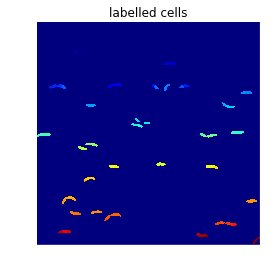

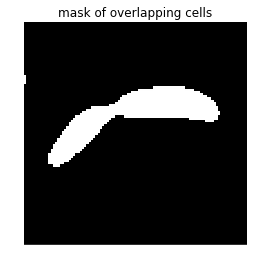

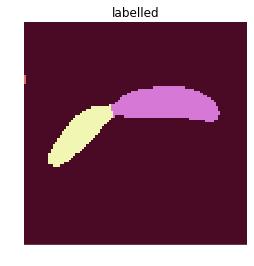

In [57]:
import matplotlib
random_colors = matplotlib.colors.ListedColormap(np.random.rand(256,3))

markers_im = measure.label(peaks_im)
labelled_cell_im = morphology.watershed(-distance_im, markers_im, mask=blurred_mask_clean)
#the watershed is what separates overlapping objects. See below

my_imshow(labelled_cell_im, 'labelled cells', cmap='jet')
my_imshow(blurred_mask_clean[850:950, 300:400], 'mask of overlapping cells')
my_imshow(labelled_cell_im[850:950, 300:400], 'labelled', cmap=random_colors)

morphology.watershed(image, markers, connectivity=None, offset=None, mask=None)

This function implements a watershed algorithm [R319]_that apportions pixels into marked basins. The algorithm uses a priority queue to hold the pixels with the metric for the priority queue being pixel value, then the time of entry into the queue - this settles ties in favor of the closest marker.

Some ideas taken from Soille, “Automated Basin Delineation from Digital Elevation Models Using Mathematical Morphology”, Signal Processing 20 (1990) 171-182

The most important insight in the paper is that entry time onto the queue solves two problems: a pixel should be assigned to the neighbor with the largest gradient or, if there is no gradient, pixels on a plateau should be split between markers on opposite sides.

This implementation converts all arguments to specific, lowest common denominator types, then passes these to a C algorithm.

Markers can be determined manually, or automatically using for example the local minima of the gradient of the image, or the local maxima of the distance function to the background for separating overlapping objects (see example).

The algorithm works also for 3-D images, and can be used for example to separate overlapping spheres.